In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px


from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/booking_hotel.csv', encoding='Windows-1252')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
df.sort_values(by=['Hotel Name'])

,Hotel Name,Location,Rating,Review Score,Number of,Room Score,Room Type,Bed Type,Room Price (in BDT or any other currency)
3048,able townhouse in the heart of Paris,"15th arr., Paris",5.9,Review score,26,NaN,Studio,1 sofa bed,"267,527"
872,100 Islands Resort & Spa,Suratthani,7.9,Good,136,8.2,Superior Double or Twin Room,Multiple bed types,"58,225"
3137,16ième Très beau appartement Parc des princes ...,Paris,NaN,NaN,NaN,NaN,One-Bedroom Apartment,"2 beds (1 full, 1 sofa bed)","736,346"
3152,19 Atelier Montorgueil,"2nd arr., Paris",5,Review score,7,NaN,Apartment - Ground Floor,"4 beds (2 fulls, 2 sofa beds)","702,166"
3073,1K Paris,"3rd arr., Paris",7.6,Good,858,8.1,Deluxe L Double Room,Multiple bed types,"813,056"
...,...,...,...,...,...,...,...,...,...
2843,room007 Select Tetuán,"Old Town, Seville",8.5,Very Good,"3,472",8.7,Superior Double Room with Balcony,1 full bed,"773,556"
1842,room007 Select Tetuán,"Old Town, Seville",8.5,Very Good,"3,472",8.7,Superior Double Room with Balcony,1 full bed,"773,556"
3316,voco Orchard Singapore,"Orchard, Singapore",8,Very Good,289,8.4,Deluxe Room,1 king bed,"581,244"
1100,ÁTICO ESTRELLA,Tejina de Isora,9.1,Wonderful,24,8.7,Apartment,"2 beds (1 full, 1 sofa bed)","109,655"


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Hotel Name                                 3465 non-null   object 
 1   Location                                   3465 non-null   object 
 2   Rating                                     3365 non-null   object 
 3   Review Score                               3359 non-null   object 
 4   Number of                                  3359 non-null   object 
 5   Room    Score                              2709 non-null   float64
 6   Room Type                                  3465 non-null   object 
 7   Bed Type                                   3449 non-null   object 
 8   Room Price (in BDT or any other currency)  3465 non-null   object 
dtypes: float64(1), object(8)
memory usage: 243.8+ KB


In [137]:
df.columns

Index(['Hotel Name', 'Location', 'Rating', 'Review Score', 'Number of   ',
       'Room    Score', 'Room Type', 'Bed Type',
       'Room Price (in BDT or any other currency)'],
      dtype='object')

In [138]:
df = df.rename(columns={'Number of   ': 'Number of reviews'})
df = df.rename(columns={'Room    Score': 'Room Score'})

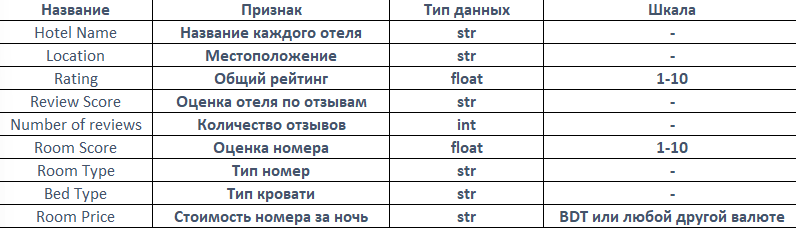

In [139]:
# convert Rating and Number of reviews columns to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of reviews'] = pd.to_numeric(df['Number of reviews'], errors='coerce')

# drop rows with missing data in Rating and Number of reviews columns
df = df.dropna(subset=['Rating', 'Number of reviews'])

# Гипотеза 1: Отели с более высокими общими рейтингами получают больше отзывов, чем отели с более низкими рейтингами.

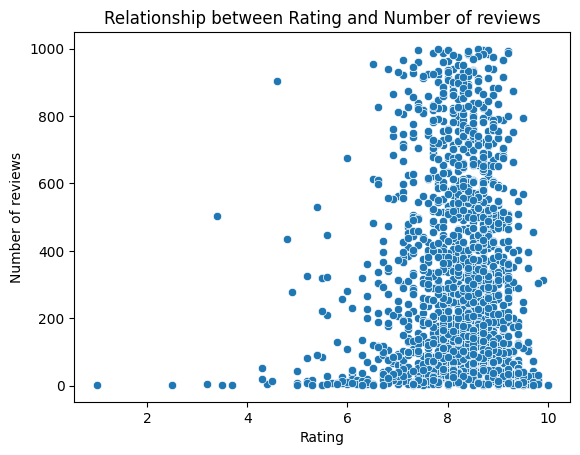

In [140]:
sns.scatterplot(x='Rating', y='Number of reviews', data=df)

plt.title('Relationship between Rating and Number of reviews')
plt.xlabel('Rating')
plt.ylabel('Number of reviews')

plt.show()

Результатом выполнения этого кода будет scatter plot, на котором можно увидеть, как связаны общий рейтинг и количество отзывов отелей. Скопление точек на графике располагаются таким образом, что более высоким рейтингам соответствуют большие значения количества отзывов, а значит гипотеза **подтвердилась**.

# Гипотеза 2: Существует положительная корреляция (увеличение одной переменной связано с увеличением другой переменной) между оценкой отзыва и количеством отзывов об отеле.

In [141]:
fig = px.scatter(df, x='Rating', y='Number of reviews', color='Rating')
fig.update_layout(title='Dependence of the number of reviews on the rating of the hotel', xaxis_title='Rating', yaxis_title='Number of reviews')
fig.show()


На основании графика, можно сделать вывод, что существует положительная корреляция между рейтингом отеля и количеством отзывов об отеле - чем выше рейтинг, тем больше количество отзывов. Но в целом такой закономерности нет, ведь видно, что количество точек с высоким рейтингом могут образовать полосы по оси количества отзывов, так как это число сильно разниться от отеля к отелю. Использование интерактивной визуализации в plotly позволяет более детально рассмотреть эту зависимость.

# Гипотеза 3: Номера с более высокими рейтингами получают больше отзывов, чем номера с более низкими рейтингами.

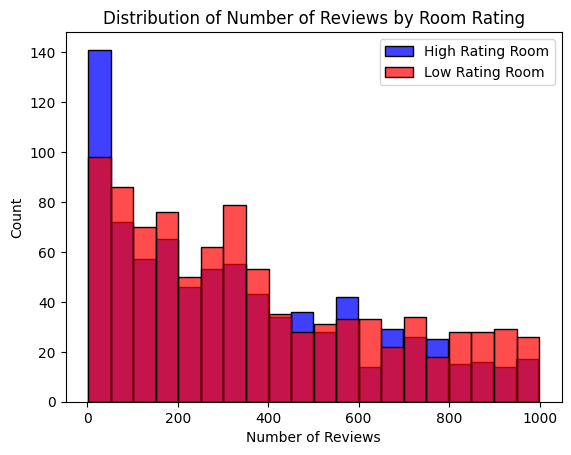

In [142]:
# Создаем датафрейм с номерами отелей, у которых рейтинг выше среднего
high_rating_df = df[df['Room Score'] > df['Room Score'].mean()]

# Создаем датафрейм с номерами отелей, у которых рейтинг ниже среднего
low_rating_df = df[df['Room Score'] < df['Room Score'].mean()]

# Строим гистограммы для количества отзывов для номеров в отелях с высоким и низким рейтингом
sns.histplot(high_rating_df['Number of reviews'], bins=20, color='blue', label='High Rating Room')
sns.histplot(low_rating_df['Number of reviews'], bins=20, alpha=0.7, color='red', label='Low Rating Room')

plt.title('Distribution of Number of Reviews by Room Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.legend()

plt.show()

График имеет 2 цвета: синий для гистограммы с номерами в отелях с высоким рейтингом и красный для гистограммы с номерами в отелях с низким рейтингом. Красный цвета стали более прозрачными, чем изначально заданные цвет, потому что у него есть свойство прозрачности, чтобы посмотреть как ведет себя синий цвет.

Как мы можем заметить, гипотеза не подтвердилась. Номера с более низким рейтингом получают больше отзывов.

# Гипотеза 4: Цена гостиничного номера положительно коррелирует с общим рейтингом отеля.

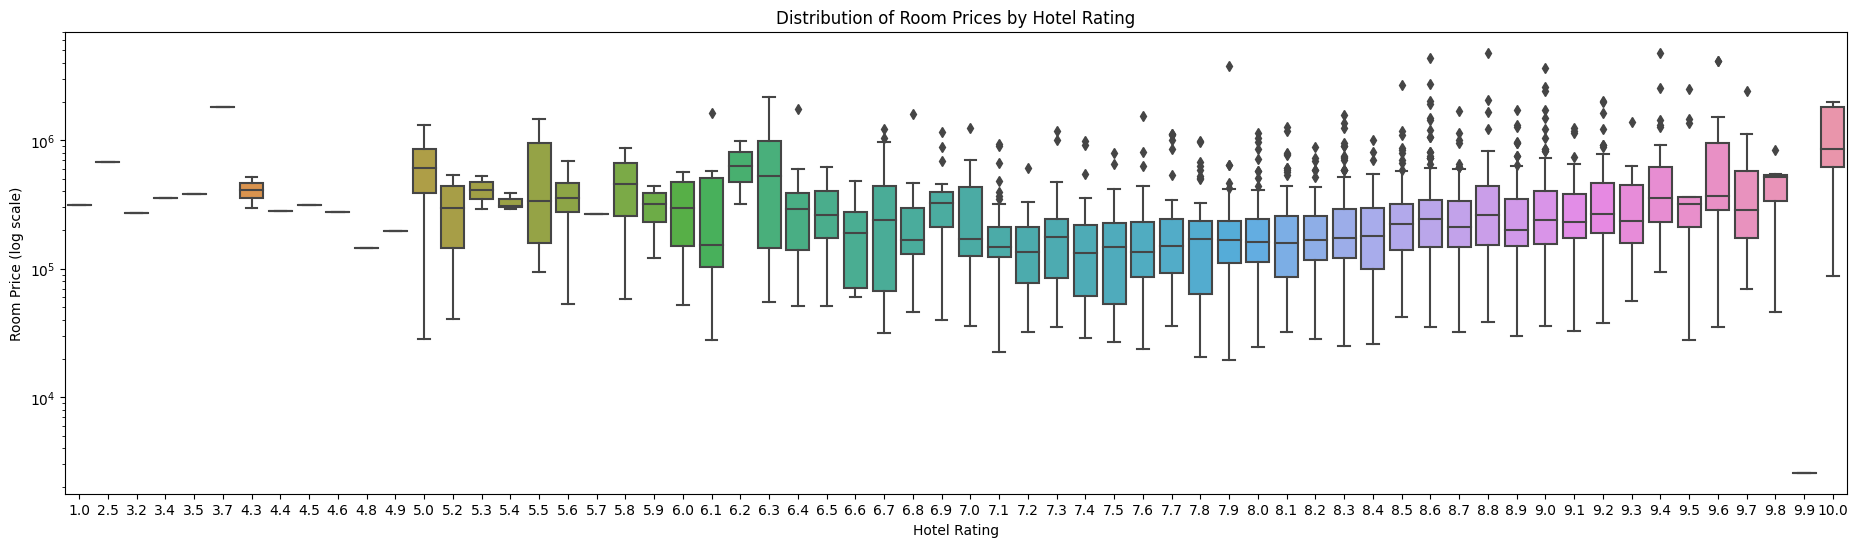

In [143]:
df['Room Price (in BDT or any other currency)'] = df['Room Price (in BDT or any other currency)'].str.replace(',', '').str.replace('\xa0', '').astype(float)

fig, ax = plt.subplots(figsize=(23, 6))
sns.boxplot(x='Rating', y='Room Price (in BDT or any other currency)', data=df, ax=ax)
plt.yscale('log')
plt.title('Distribution of Room Prices by Hotel Rating')
plt.xlabel('Hotel Rating')
plt.ylabel('Room Price (log scale)')
plt.show()


Гипотезу нельзя назвать неверной, но можно заметить, что у отелей с низким рейтингом номера цена по медиане может быть выше, чем у отеля со средним рейтингом номера отеля.

# Гипотеза 5: Цена гостиничного номера положительно коррелирует с оценкой номера.

In [144]:
fig = px.box(df, x="Room Score", y="Room Price (in BDT or any other currency)", points="all")
fig.update_layout(
    title="Distribution of Room Prices by Room Score",
    xaxis_title="Room Score",
    yaxis_title="Room Price (in BDT or any other currency)"
)
fig.show()


Box plot показал распределение цены номеров для каждой оценки. Если цена гостиничного номера Room Price положительно коррелирует с оценкой номера Room Score, то можно ожидать, что распределение цены будет более высоким для более высоких оценок номеров. Гипотеза подтвердилась.

# Гипотеза 6: Отели с большим разнообразием типов номеров получают больше отзывов, чем отели с меньшим количеством типов номеров.

In [145]:
# Вычисляем количество типов номеров для каждого отеля
room_types = df.groupby('Hotel Name')['Room Type'].nunique().reset_index(name='Num Room Types')

# Вычисляем количество отзывов для каждого отеля
num_reviews = df.groupby('Hotel Name')['Number of reviews'].sum().reset_index(name='Num Reviews')

# Объединяем данные
data = pd.merge(room_types, num_reviews, on='Hotel Name')

# Строим scatter plot
scatter = alt.Chart(data).mark_circle(size=60).encode(
    x='Num Room Types',
    y='Num Reviews',
    tooltip=['Hotel Name', 'Num Room Types', 'Num Reviews']
).properties(
    width=600,
    height=400,
    title='Number of Room Types vs. Number of Reviews'
)

# Добавляем trendline
trendline = scatter.transform_regression('Num Room Types', 'Num Reviews').mark_line(color='red')

# Выводим график
scatter + trendline


alt.LayerChart(...)

Оказалось, что данный датафрейм в большинстве содержит несколько записей об отеле с 1 типом номеров, так как нашлось всего 3 отеля, где типов оказалось 2. Гипотеза не подтвердилась.